In [1]:
! pwd

/cellar/users/mdow/Projects/HCC/Automate_figure_generate


In [130]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/mdow/Projects/HCC/Automate_figure_generate/imports.ipynb")

(561, 7)
y    559
n      2
Name: Cancer_census, dtype: int64


### Load data

In [18]:
indir = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/'
#mouse = pd.read_pickle(indir + 'mouse_mut_final.pkl')
mouse_fname = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/annotated_final_filtered_01162018.csv'
mouse = pd.read_csv(mouse_fname,index_col=0)
mouse['Species'] = 'Mouse'
human = pd.read_pickle(indir + 'human_mut_final.pkl')
print mouse.shape, human.shape

#unstackDf = pd.read_pickle('/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/mutation_score_table_combo.pkl')
#mouse_mutScore = unstackDf[~unstackDf.index.str.contains('DO')]
#print unstackDf.shape, mouse_mutScore.shape
mouse_mutScore = pd.read_pickle('mouse_mutation_score.pkl')

#pValDf = pd.read_pickle('/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/gene_rank_pVal.pkl')
pValDf = pd.read_pickle('gene_rank_pVal_filtered.pkl')
print pValDf.shape

(82431, 40) (842447, 20)
(14104, 5)


In [19]:
#human_mutScore = pd.read_pickle('human_mutation_score.pkl')
human_mutScore = pd.read_pickle('human_tcga_icgc_mutation_score.pkl')

In [63]:
human = pd.read_pickle('human_tcga_icgc_mutations.pkl')

In [64]:
human['Species'] = 'Human'


In [66]:
human.head()

,MODEL,SAMPLE,SYMBOL,Consequence,Score,Species
0,LICA-CN,DO224538,SPOCD1,synonymous_variant,1,Human
1,LICA-CN,DO224538,LMNA,missense_variant,4,Human
2,LICA-CN,DO224538,KCND3,missense_variant,4,Human
3,LICA-CN,DO224538,PTCHD2,synonymous_variant,1,Human
4,LICA-CN,DO224538,OR2T3,missense_variant,4,Human


### Processing

In [71]:
subCols = ['MODEL','SAMPLE','SYMBOL','Consequence','Species']

combo = pd.concat([mouse[subCols],human[subCols]])

#combo[combo.Species == 'Human'].groupby('SYMBOL').SAMPLE.nunique()

nonSyn_ls = missense + nonsense + splice + frameshift + inframeIndel
combo['nonSyn'] = combo.Consequence.isin(nonSyn_ls)

'''
Count gene alteration
'''
mask_h = combo.Species == 'Human'
mask_m = combo.Species == 'Mouse'
m1= combo.nonSyn == True

geneCnt_h = combo[(mask_h&m1)].groupby(['SYMBOL']).SAMPLE.nunique().reset_index(name='Count')
geneCnt_m = combo[(mask_m&m1)].groupby(['SYMBOL']).SAMPLE.nunique().reset_index(name='Count')

numH = combo[(mask_h&m1)].SAMPLE.nunique()
numM = combo[(mask_m&m1)].SAMPLE.nunique()
geneCnt_m ['Pct'] =geneCnt_m.Count/float(numM)
geneCnt_h ['Pct'] =geneCnt_h.Count/float(numH)

geneCnt_h.head()

'''
Count total mutations human
'''
# For stack plot - need the total (green) and the non-syn (blue)
mutCnt_h = combo[(mask_h&m1)].groupby(['SAMPLE']).nonSyn.value_counts().reset_index(name='nonSyn_Count')

mutCnt_total_h= human[human.Consequence.isin(syn+nonSyn_ls)].groupby('SAMPLE').size().reset_index(name='Total')

mutCnt_all_h = pd.merge(mutCnt_h,mutCnt_total_h)

### Set myGenes !!!

In [72]:
tcga_genes = pd.read_csv('tcga_hcc_genes.txt',header=None)
icgc_genes = pd.read_csv('icgc_hcc_genes.txt',header=None)
tcga_genes.columns = ['Gene']
icgc_genes.columns = ['Gene']

hcc_genes = tcga_genes.Gene.tolist() + icgc_genes.Gene.tolist()

In [74]:
human.MODEL.value_counts()

LINC-JP    206815
LICA-FR    132484
TCGA        53543
LIHC-US     25902
LICA-CN     15966
Name: MODEL, dtype: int64

## Replace LIHC-US with TCGA

In [75]:
human_filt = human[human.MODEL != 'LIHC-US']

In [81]:
human_filt.groupby(['MODEL']).SAMPLE.nunique()

MODEL
LICA-CN    163
LICA-FR    240
LINC-JP    244
TCGA       364
Name: SAMPLE, dtype: int64

In [83]:
human_filt.groupby(['MODEL']).size()

MODEL
LICA-CN     15966
LICA-FR    132484
LINC-JP    206815
TCGA        53543
dtype: int64

In [84]:
human_mutScore_filt = human_mutScore.loc[human_filt.SAMPLE.unique()]

In [85]:
human_mutScore_filt.shape, human_mutScore.shape

((1011, 37091), (1199, 37091))

In [102]:
human_filt.MODEL[human_filt.MODEL=='TCGA'] = 'LIHC-US'

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_globa

## Try with subset of genes and subset of patients with mutations

In [103]:
humanToProj_dict = human_filt.set_index(['SAMPLE'])['MODEL'].to_dict()

In [104]:
sub_genes = ['ALB', 'APOB', 'ARID1A', 'ARID2', 'AXIN1', 'CTNNB1', 'KMT2D', 'LRP1B', 'TP53', 'TSC2']

geneCnt_h_sub, geneCnt_m_sub, human_sub = subset_dfs_human(sub_genes, geneCnt_h, geneCnt_m, human_mutScore_filt)

human_sum = human_sub.sum(axis=1) > 5
human_noZ = human_sub.loc[human_sum,:]
print human_noZ.shape

geneCnt_h_srt, geneCnt_m_srt, human_sub_srt = sort_dfs_human(geneCnt_h_sub, geneCnt_m_sub,human_noZ,'human')

#!! take the ones that are non-zero 

mySorted = sort_comut_human(human_sub_srt,geneCnt_h_srt,humanToProj_dict)

Sub count tables in human and mouse: (10, 3) (10, 3)
Sub main table: (1011, 10)
(222, 10)
['TP53', 'CTNNB1', 'ALB', 'APOB', 'ARID1A', 'LRP1B', 'AXIN1', 'ARID2', 'KMT2D', 'TSC2']
sort comut
     Model                                             Sample
0  LICA-CN  [DO224866, DO224912, DO224800, DO224552, DO224...
1  LICA-FR  [DO50902, DO50771, DO44692, DO50919, DO50928, ...
2  LIHC-US  [A5SJ, AAV4, AACB, A7MD, A4ZQ, A25Z, A7MC, A7D...
3  LINC-JP  [DO23366, DO23158, DO23270, DO23308, DO23296, ...
LICA-CN
25
LICA-FR
83
LINC-JP
155
LIHC-US
222


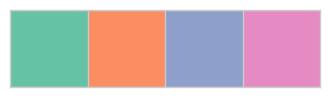

In [105]:
colors = sns.color_palette("Set2", 4)
sns.palplot(colors)

In [118]:
83-25, 155-83, 222-155

(58, 72, 67)

In [ ]:
#LICA-CN 25
#LICA-FR 58
#LINC-JP 72
#LIHC-US 67

(222, 10) 222


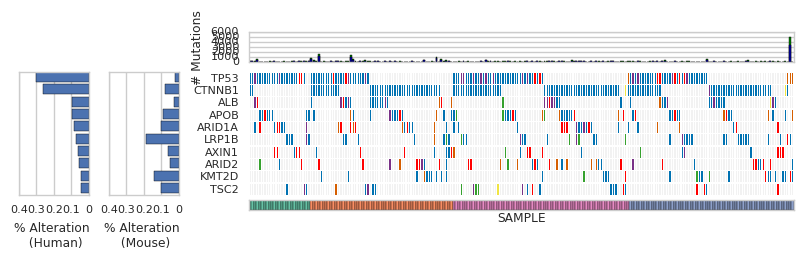

In [145]:
subSams = mySorted.index
print mySorted.shape, len(subSams)
sub_mutCnt_h = mutCnt_all_h[mutCnt_all_h.SAMPLE.isin(subSams)]

sub_mutCnt_h.index = sub_mutCnt_h.SAMPLE
sub_mutCnt_h_srt = sub_mutCnt_h.loc[mySorted.index.tolist()]

plot_final_small_human(mySorted, sub_mutCnt_h, geneCnt_h_srt, geneCnt_m_srt, humanToProj_dict,'human_all_hcc_cohorts.pdf')

In [132]:

'''
sort samples and mutations like coMut waterfall
'''
def sort_comut_human_mixed(human_sub_srt,geneCnt_h_srt,myDict):
    print 'sort comut'
    #1. change to binary
    #2. sort by genes
    df_bi = human_sub_srt.copy()
    df_bi[df_bi > 1] = 1

    models = pd.Series(human_sub_srt.index).map(myDict)

    myModels = models.unique()
    df_bi['models'] = models.tolist()
    
    df_bi = df_bi.set_index([df_bi.models,df_bi.index])

    myGenes = geneCnt_m_srt.index.tolist()
    #print myGenes
    df_srt = df_bi.sort_values(myGenes,ascending=False).T
    sample_sorted = df_srt.columns.tolist()

    # Get new order sorted by models
    sample_srtDf = pd.DataFrame(sample_sorted)
    sample_srtDf.columns = ['Model','Sample']
    #print sample_srtDf.head()
    tmp = sample_srtDf.groupby(['Model']).Sample.unique().reset_index()
    
    print tmp
    newOrder=sample_srtDf.Sample.tolist()

    mySorted = human_sub_srt.reindex(newOrder)
    return mySorted

In [137]:
mySorted2.head()

SYMBOL,TP53,CTNNB1,ALB,APOB,ARID1A,LRP1B,AXIN1,ARID2,KMT2D,TSC2
SAMPLE,,,,,,,,,,
DO50902,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A5SJ,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DO23366,4.0,4.0,0.0,4.0,4.0,0.0,-1.0,0.0,0.0,0.0
AAV4,2.0,4.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0
DO50771,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


sort comut
     Model                                             Sample
0  LICA-CN  [DO224866, DO224912, DO224800, DO224552, DO224...
1  LICA-FR  [DO50902, DO50771, DO44692, DO50919, DO50928, ...
2  LIHC-US  [A5SJ, AAV4, AACB, A7MD, A4ZQ, A25Z, A7MC, A7D...
3  LINC-JP  [DO23366, DO23158, DO23270, DO23308, DO23296, ...


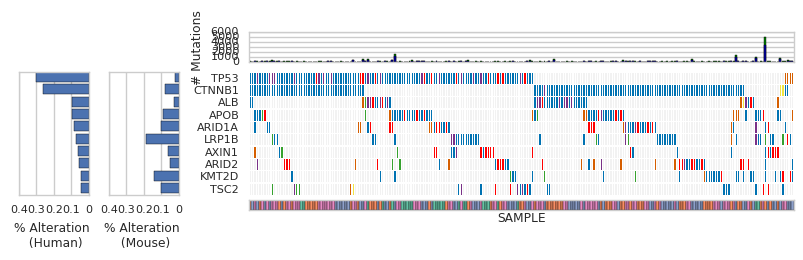

In [144]:
mySorted2 = sort_comut_human_mixed(human_sub_srt,geneCnt_h_srt,humanToProj_dict)
sub_mutCnt_h.index = sub_mutCnt_h.SAMPLE
sub_mutCnt_h_srt = sub_mutCnt_h.loc[mySorted2.index.tolist()]
plot_final_small_human(mySorted2, sub_mutCnt_h_srt, geneCnt_h_srt, geneCnt_m_srt, humanToProj_dict,'human_all_hcc_mixed.pdf')

In [114]:
! pwd

/cellar/users/mdow/Projects/HCC/Automate_figure_generate
